In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
train = pd.read_csv("E:/Life/Loan Prediction AV/dataset/train.csv")
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [95]:
train_updated = pd.read_csv("E:/Life/Loan Prediction AV/dataset/train_3.csv")
train_updated.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [104]:
train_updated4 = pd.read_csv("E:/Life/Loan Prediction AV/dataset/train_4.csv")
train_updated4.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,8.674026,0.0,4.852030,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,8.430109,1508.0,4.852030,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,8.006368,0.0,4.189655,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,7.856707,2358.0,4.787492,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,8.699515,0.0,4.948760,360.0,1.0,2,1


In [46]:
categorical_features = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area', 'Loan_Status','Credit_History']
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']
target = 'Loan_Status'

## Categorical features

### count the number of each catregorial feature

Male      0.796417
Female    0.182410
Name: Gender, dtype: float64

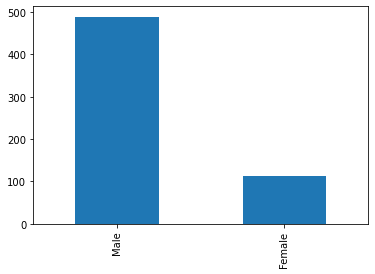

In [47]:
train['Gender'].value_counts().plot(kind = 'bar')
train['Gender'].value_counts()/len(train)

1.0    0.773616
0.0    0.144951
Name: Credit_History, dtype: float64

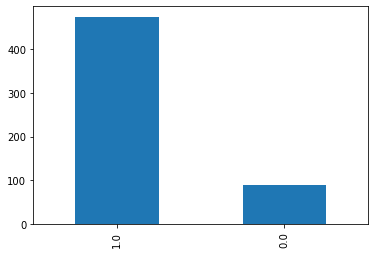

In [48]:
train['Credit_History'].value_counts().plot(kind = 'bar')
train['Credit_History'].value_counts()/len(train)

Yes    0.648208
No     0.346906
Name: Married, dtype: float64

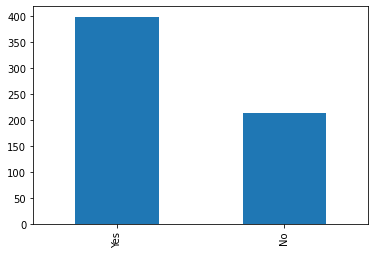

In [49]:
train['Married'].value_counts().plot(kind = 'bar')
train['Married'].value_counts()/len(train)

0     0.561889
1     0.166124
2     0.164495
3+    0.083062
Name: Dependents, dtype: float64

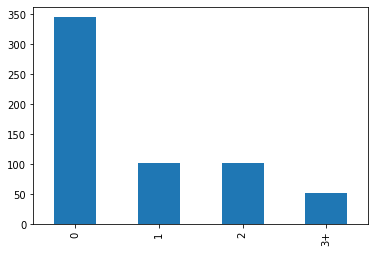

In [50]:
train['Dependents'].value_counts().plot(kind = 'bar')
train['Dependents'].value_counts()/len(train)

Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64

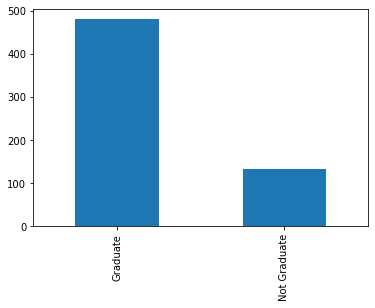

In [51]:
train['Education'].value_counts().plot(kind = 'bar')
train['Education'].value_counts()/len(train)

No     0.814332
Yes    0.133550
Name: Self_Employed, dtype: float64

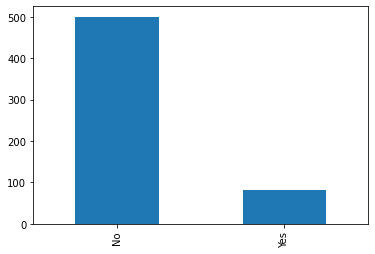

In [52]:
train['Self_Employed'].value_counts().plot(kind = 'bar')
train['Self_Employed'].value_counts()/len(train)

Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64

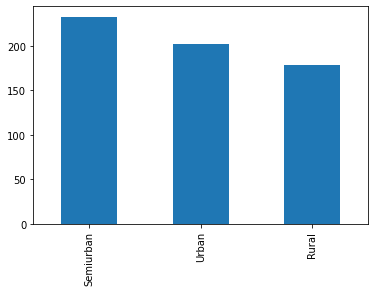

In [53]:
train['Property_Area'].value_counts().plot(kind = 'bar')
train['Property_Area'].value_counts()/len(train)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

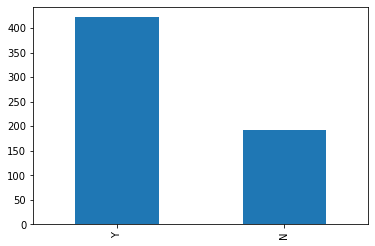

In [54]:
train['Loan_Status'].value_counts().plot(kind = 'bar')
train['Loan_Status'].value_counts()/len(train)

### Observations:
1. 80% are male and 20% female
2. almost 80% people having good credit history
3. 64% are married
4. almost 72% has either 0 dependent or 1 dependent
5. 78% are Graduates
6. 81% are Self-employed
7. Property_Area are almost same in number
8. 68% loans are approved

### count the approved and not approbed based on feature

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


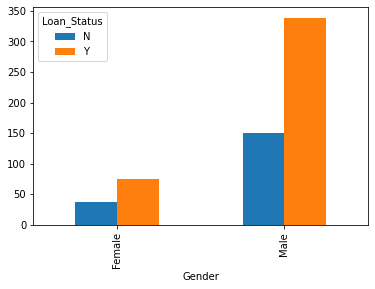

In [55]:
pd.crosstab(train['Gender'],train[target]).plot(kind = 'bar')
pd.crosstab(train['Gender'],train[target])

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


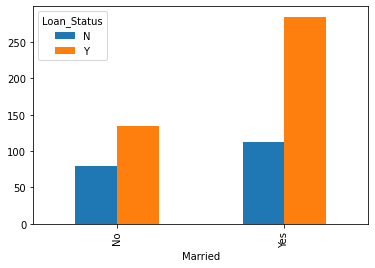

In [56]:
pd.crosstab(train['Married'],train[target]).plot(kind = 'bar')
pd.crosstab(train['Married'],train[target])

Loan_Status,N,Y
Dependents,,
0,107,238
1,36,66
2,25,76
3+,18,33


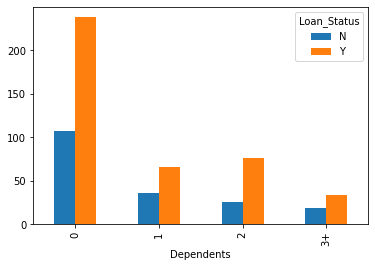

In [57]:
pd.crosstab(train['Dependents'],train[target]).plot(kind = 'bar')
pd.crosstab(train['Dependents'],train[target])

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


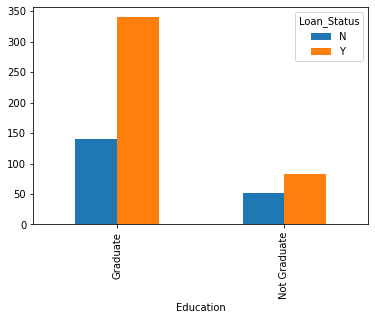

In [58]:
pd.crosstab(train['Education'],train[target]).plot(kind = 'bar')
pd.crosstab(train['Education'],train[target])

Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


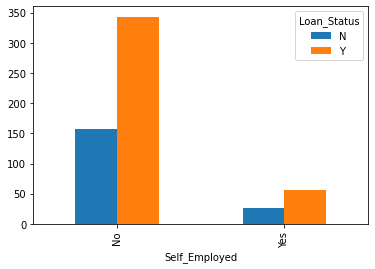

In [59]:
pd.crosstab(train['Self_Employed'],train[target]).plot(kind = 'bar')
pd.crosstab(train['Self_Employed'],train[target])

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


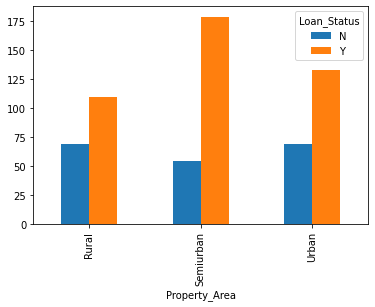

In [60]:
pd.crosstab(train['Property_Area'],train[target]).plot(kind = 'bar')
pd.crosstab(train['Property_Area'],train[target])

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


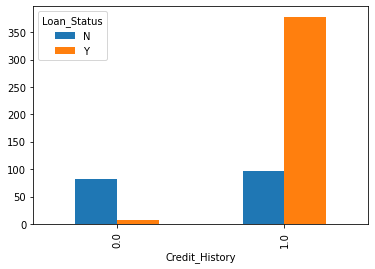

In [62]:
pd.crosstab(train['Credit_History'],train[target]).plot(kind = 'bar')
pd.crosstab(train['Credit_History'],train[target])

### Observations:
1. maximum loans are approved for male
2. for married more loans are approved
3. people having 0 dependents has higher chance of loan approval
4. people with Graduation  has higher chance of loan approval
5. self-employed person has less chance of loan approval
6. loans are more approved for sub urban area but it is almost equal
7.  people having creait history has hogher chance of loan approval

### Numerical variable

### check the distribution for each variable
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']

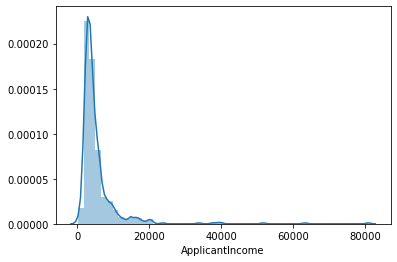

In [66]:
sns.distplot(train['ApplicantIncome'],hist = True,kde = True)

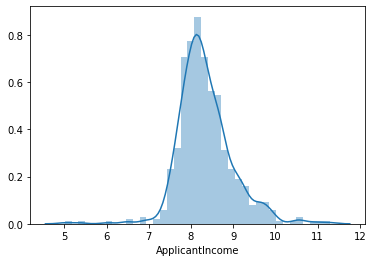

In [96]:
sns.distplot(np.log(train_updated['ApplicantIncome']),hist = True,kde = True)

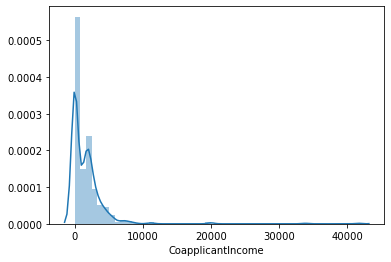

In [67]:
sns.distplot(train['CoapplicantIncome'],hist = True,kde = True)

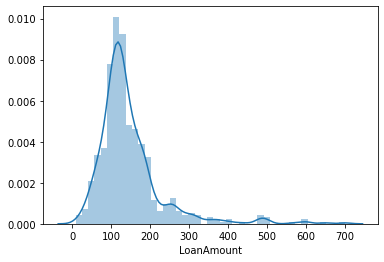

In [102]:
sns.distplot(train['LoanAmount'],hist = True,kde = True)

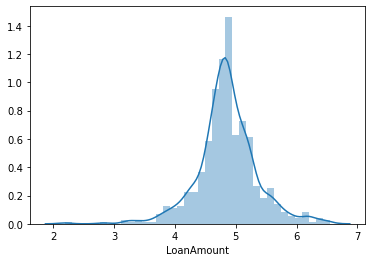

In [101]:
sns.distplot(np.log(train_updated['LoanAmount']),hist = True,kde = True)

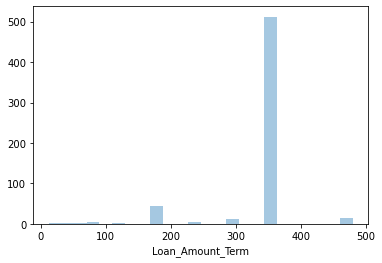

In [70]:
sns.distplot(train['Loan_Amount_Term'],hist = True,kde = False)

### draw boxplot to check the outliers

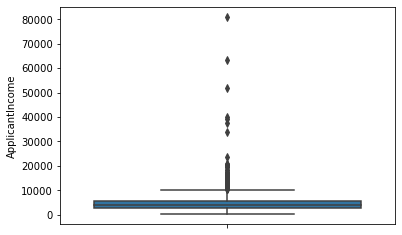

In [73]:
sns.boxplot(train['ApplicantIncome'],orient = 'v')

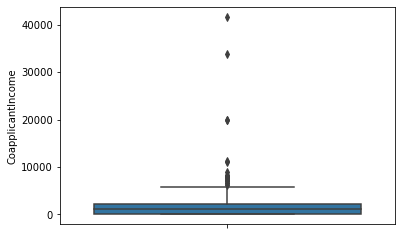

In [74]:
sns.boxplot(train['CoapplicantIncome'],orient = 'v')

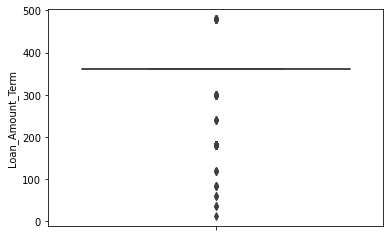

In [75]:
sns.boxplot(train['Loan_Amount_Term'],orient = 'v')

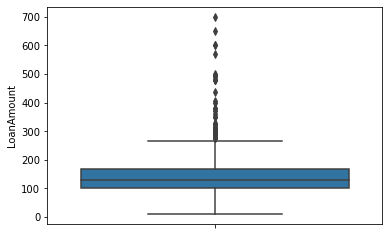

In [76]:
sns.boxplot(train['LoanAmount'],orient = 'v')

### check the stats using describe

In [79]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


# observation:
1. we couls see that there are missing values for LoanAmount,Loan_Amount_term,credit_history(basically it is categorical variable)
2. there are outliers for each  feature
3. distributions are not normal for any feature

## Now check  whate is the mean of each numberical variable which got approved

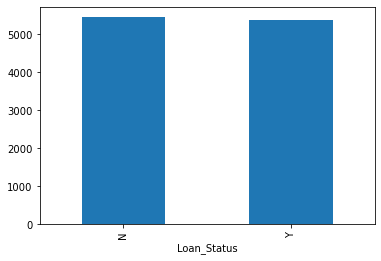

In [89]:
train.groupby(target)['ApplicantIncome'].mean().plot(kind = 'bar')

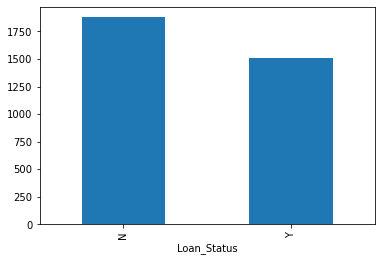

In [90]:
train.groupby(target)['CoapplicantIncome'].mean().plot(kind = 'bar')

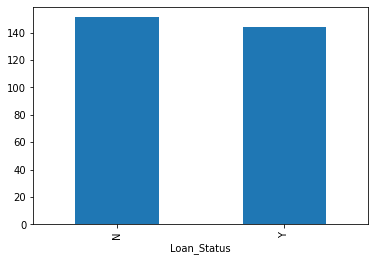

In [91]:
train.groupby(target)['LoanAmount'].mean().plot(kind = 'bar')

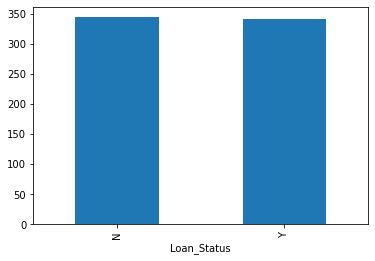

In [92]:
train.groupby(target)['Loan_Amount_Term'].mean().plot(kind = 'bar')